# Part I - (ford gobike dataset)
## by (Asim)

## Introduction

the dataset will be using is ford gobike dataset which is a bike-sharing service in San Francisco in 2019 the dataset have 16 features('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip')

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#importing the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv');
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## cleaning

> No need to handle the missing values since it is a too small subset of the data, so removing them is easie

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

In [7]:
df.sample(10,random_state=12)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
98670,753,2019-02-15 07:08:52.5520,2019-02-15 07:21:25.8070,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2016,Subscriber,1985.0,Male,No
5949,554,2019-02-28 11:40:00.1260,2019-02-28 11:49:14.9410,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,80.0,Townsend St at 5th St,37.775235,-122.397437,4874,Subscriber,1993.0,Male,No
13437,484,2019-02-27 16:07:20.9070,2019-02-27 16:15:25.4220,317.0,San Salvador St at 9th St,37.333955,-121.877349,357.0,2nd St at Julian St,37.341132,-121.892844,6388,Subscriber,1995.0,Male,Yes
94767,119,2019-02-15 15:57:58.2570,2019-02-15 15:59:57.6800,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,267.0,Derby St at College Ave,37.861804,-122.253569,5461,Subscriber,1998.0,Male,No
18370,917,2019-02-26 18:36:25.1660,2019-02-26 18:51:42.8300,14.0,Clay St at Battery St,37.795001,-122.399970,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,6481,Subscriber,1993.0,Female,No
101994,706,2019-02-14 16:58:54.1700,2019-02-14 17:10:40.4450,13.0,Commercial St at Montgomery St,37.794231,-122.402923,60.0,8th St at Ringold St,37.774520,-122.409449,4930,Subscriber,1985.0,Female,No
19500,1626,2019-02-26 16:29:05.7350,2019-02-26 16:56:12.2290,24.0,Spear St at Folsom St,37.789677,-122.390428,70.0,Central Ave at Fell St,37.773311,-122.444293,6572,Subscriber,1981.0,Male,No
137426,723,2019-02-08 08:38:30.3530,2019-02-08 08:50:34.2210,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4966,Customer,1989.0,Female,No
103647,123,2019-02-14 12:05:14.6930,2019-02-14 12:07:17.9110,305.0,Ryland Park,37.342725,-121.895617,357.0,2nd St at Julian St,37.341132,-121.892844,1119,Subscriber,1993.0,Male,Yes
168588,444,2019-02-04 14:32:33.4750,2019-02-04 14:39:58.0550,133.0,Valencia St at 22nd St,37.755213,-122.420975,77.0,11th St at Natoma St,37.773507,-122.416040,5120,Subscriber,1981.0,Male,No


In [8]:
# Define categories for gender, user type, and bike share
gender_categories = ['Male', 'Female', 'Other']
user_categories = ['Customer', 'Subscriber']
share_categories = ['No', 'Yes']

# Convert categorical columns to Pandas Categorical type with specified categories
df['member_gender'] = df['member_gender'].astype(pd.CategoricalDtype(categories=gender_categories, ordered=False))
df['user_type'] = df['user_type'].astype(pd.CategoricalDtype(categories=user_categories, ordered=False))
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype(pd.CategoricalDtype(categories=share_categories, ordered=False))

# Function to change the data type of specified columns
def change_type(column, dtype):
    df[column] = df[column].astype(dtype)

# Change data types for specific columns
change_type('start_station_id', 'int64')
change_type('end_station_id', 'int64')
change_type('member_birth_year', 'int32')

# Change data type of start and end station IDs to 'object'
change_type('start_station_id', 'object')
change_type('end_station_id', 'object')

# Convert 'start_time' and 'end_time' columns to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate age based on current year and 'member_birth_year'
today = datetime.date.today()
current_year = today.year
df['age'] = current_year - df['member_birth_year']


In [9]:
a =sorted(df.age.unique())
print(a)

[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 89, 90, 92, 93, 95, 96, 103, 113, 121, 122, 123, 145]


In [10]:
#here will be removing the above 100 because it must be rown entries
df = df[df['age'] < 103]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174877 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174877 non-null  int64         
 1   start_time               174877 non-null  datetime64[ns]
 2   end_time                 174877 non-null  datetime64[ns]
 3   start_station_id         174877 non-null  object        
 4   start_station_name       174877 non-null  object        
 5   start_station_latitude   174877 non-null  float64       
 6   start_station_longitude  174877 non-null  float64       
 7   end_station_id           174877 non-null  object        
 8   end_station_name         174877 non-null  object        
 9   end_station_latitude     174877 non-null  float64       
 10  end_station_longitude    174877 non-null  float64       
 11  bike_id                  174877 non-null  int64         
 12  user_type            

In [12]:
df.sample(10,random_state=2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
49491,717,2019-02-21 21:24:19.993,2019-02-21 21:36:17.979,124,19th St at Florida St,37.760447,-122.410807,72,Page St at Scott St,37.772406,-122.435650,4725,Subscriber,1994,Male,No,29
5500,1937,2019-02-28 12:31:57.849,2019-02-28 13:04:15.674,197,El Embarcadero at Grand Ave,37.808848,-122.249680,197,El Embarcadero at Grand Ave,37.808848,-122.249680,2419,Customer,1984,Female,No,39
131010,813,2019-02-09 14:19:04.315,2019-02-09 14:32:37.848,119,18th St at Noe St,37.761047,-122.432642,377,Fell St at Stanyan St,37.771917,-122.453704,5560,Subscriber,1991,Female,No,32
56098,845,2019-02-21 09:12:42.613,2019-02-21 09:26:47.900,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,14,Clay St at Battery St,37.795001,-122.399970,3642,Subscriber,1989,Male,No,34
147964,142,2019-02-07 06:45:43.104,2019-02-07 06:48:05.449,385,Woolsey St at Sacramento St,37.850578,-122.278175,241,Ashby BART Station,37.852477,-122.270213,5131,Subscriber,1968,Male,No,55
102089,909,2019-02-14 16:49:01.846,2019-02-14 17:04:10.935,310,San Fernando St at 4th St,37.335885,-121.885660,276,Julian St at The Alameda,37.332233,-121.912516,3982,Subscriber,1990,Female,Yes,33
170435,759,2019-02-04 08:08:26.515,2019-02-04 08:21:05.956,166,College Ave at Alcatraz Ave,37.851376,-122.252523,212,Mosswood Park,37.824893,-122.260437,5161,Subscriber,1964,Male,No,59
92949,549,2019-02-15 18:10:10.611,2019-02-15 18:19:19.695,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4824,Customer,1978,Male,No,45
27898,464,2019-02-25 09:08:44.780,2019-02-25 09:16:29.247,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,266,Parker St at Fulton St,37.862464,-122.264791,5123,Subscriber,1994,Female,No,29
6190,197,2019-02-28 10:56:38.392,2019-02-28 10:59:55.935,108,16th St Mission BART,37.764710,-122.419957,100,Bryant St at 15th St,37.767100,-122.410662,4631,Subscriber,1987,Male,No,36


In [13]:
df.describe()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174877.000000,174877,174877,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.00000,174877.00000
mean,704.026007,2019-02-15 21:26:45.459697664,2019-02-15 21:38:29.984663808,37.771206,-122.351758,37.771401,-122.351335,4482.533941,1984.83907,38.16093
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1927.00000,22.00000
25%,323.000000,2019-02-08 08:32:14.876000,2019-02-08 08:42:29.801999872,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.00000,31.00000
50%,510.000000,2019-02-15 22:20:50.377999872,2019-02-15 22:33:44.547000064,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.00000,36.00000
75%,789.000000,2019-02-22 11:21:30.583000064,2019-02-22 11:36:17.220000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.00000,43.00000
max,84548.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.00000,96.00000
std,1642.528644,NaN,NaN,0.100409,0.117747,0.100313,0.117310,1659.215664,9.97047,9.97047


In [14]:
df['duration_sec'].quantile(0.99)

3176.0

In [15]:
#here I will remove the outliers
column_name = 'duration_sec'

# Calculate the 1st and 99th percentiles
percentile_1 = df[column_name].quantile(0.01)
percentile_99 = df[column_name].quantile(0.99)

# Cap values below the 1st percentile and above the 99th percentile
df[column_name] = df[column_name].clip(lower=percentile_1, upper=percentile_99)

In [16]:
df['duration_sec'].quantile(1)

3176.0

### What is the structure of your dataset?

> 16 columns and 174952 rows

### What is/are the main feature(s) of interest in your dataset?

> what is the most gender uses the service and in what type of users use the service 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration and the gender also the year could be used in this investigation 

## Univariate Exploration

### **What is the duration that users usally use the service for ?**

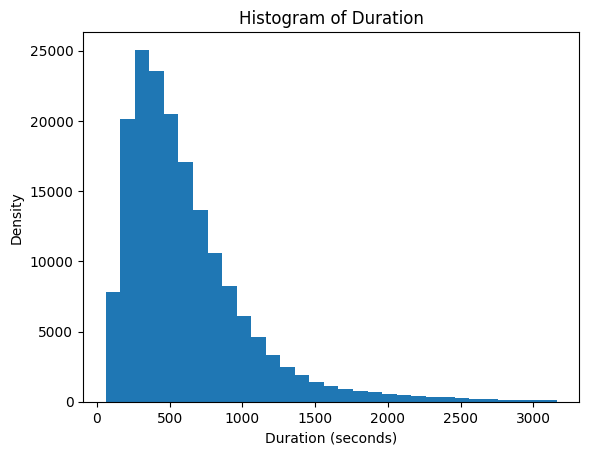

In [17]:
# Define bins for the histogram based on the 'duration_sec' column
my_bins = np.arange(60, df['duration_sec'].max(), 100)

# Create a histogram using the 'duration_sec' column with specified bins
plt.hist(data=df, x='duration_sec', bins=my_bins)

# Set labels and title for the plot
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.title('Histogram of Duration');


as we can see in the plot users usually use the service around 450 to700 second

### **Which Gender are using the Service more ?**

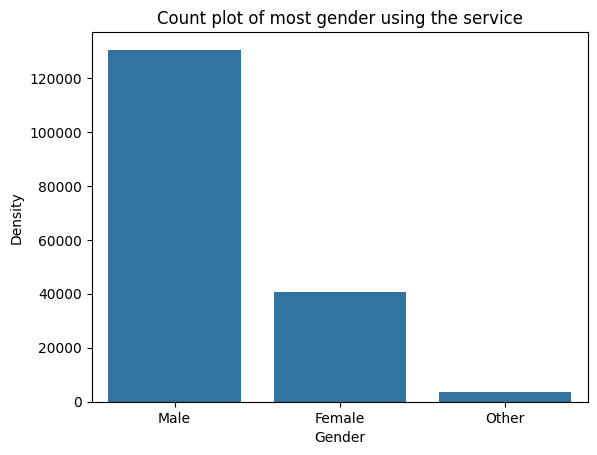

In [18]:
# Create a count plot using Seaborn for the 'member_gender' column
sns.countplot(data=df, x='member_gender', color='tab:blue')

# Set labels and title for the plot
plt.xlabel('Gender')
plt.ylabel('Density')
plt.title('Count plot of most gender using the service');


males are dominant in this service which is something interesting 

### **What type of users usually use the service ?**

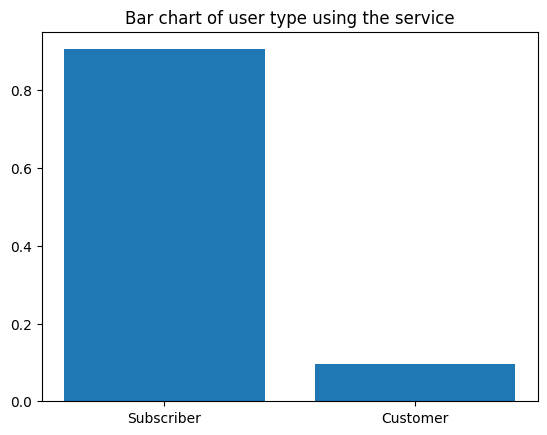

In [19]:
# Get unique values in the 'user_type' column
x = df['user_type'].unique()

# Calculate the normalized value counts for each unique user type
y = df['user_type'].value_counts(normalize=True)

# Define the order of user types
type_order = ['Subscriber', 'Customer']

# Rearrange the x and y values based on the specified order
x = [user_type for user_type in type_order]
y = [y[user_type] for user_type in type_order]

# Create a bar chart using the rearranged values
plt.bar(x, y)

# Set title for the plot
plt.title('Bar chart of user type using the service');



subscribers is more than customer which is somthing expected in these type of services

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes the duration have at the end of it a hig vlaues that it looked like it was mistakes in the data gathering so i did remove it from the data and some rows had NAN values in it so I rmoved it so we don't have to handle it when it is too small to work that hard on it  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes the duration was too hight in above the 0.99 percentile so I removed it since it is too small data to consider it and it will change the plots drastically and  changed some data type to use them effectivlly 

## Bivariate Exploration

### **Does age effect the duration of using the service ?**

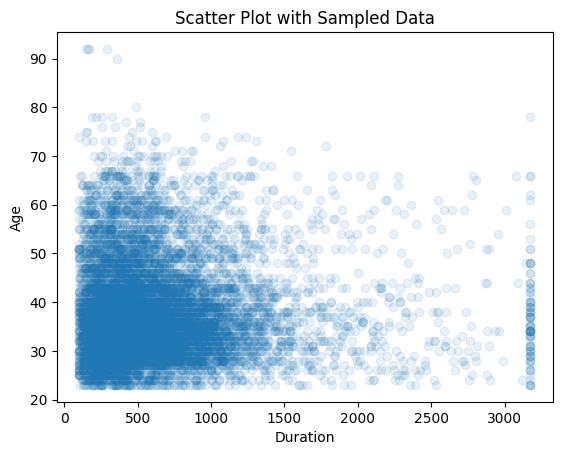

In [20]:
# Sample a subset of the DataFrame with 10,000 rows using a random state for reproducibility
sampled_data = df.sample(n=10000, random_state=42)

# Create a scatter plot using the sampled data with 'duration_sec' on the x-axis and 'age' on the y-axis
# Set alpha to 0.1 for transparency
plt.scatter(data=sampled_data, x='duration_sec', y='age', alpha=0.1)

# Set labels for the axes and a title for the plot
plt.xlabel('Duration')
plt.ylabel('Age')
plt.title('Scatter Plot with Sampled Data');


I thought age will effect the duration but from plot there is no coloration

### **Does Gender effect the duration and by how much ?**

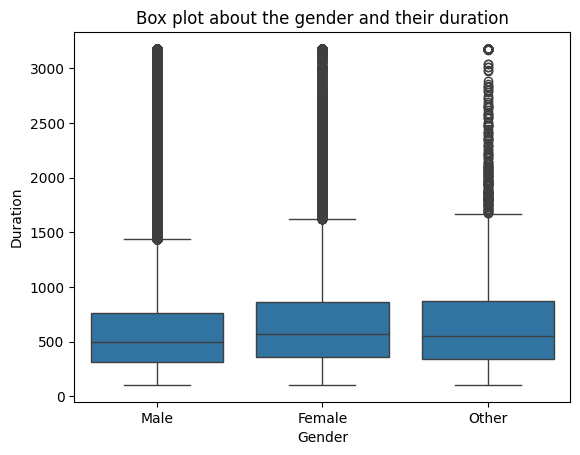

In [21]:
# Create a box plot using Seaborn to visualize the distribution of 'duration_sec' across different 'member_gender' categories
sns.boxplot(data=df, x='member_gender', y='duration_sec', color='tab:blue')

# Set labels for the x-axis and y-axis, and a title for the plot
plt.xlabel('Gender')
plt.ylabel('Duration')
plt.title('Box plot about the gender and their duration');


from this we can see that females have more time on average but not by a lot may be because males are more in this dataset so the average got lower 

### **What type of users share their bike ?** 

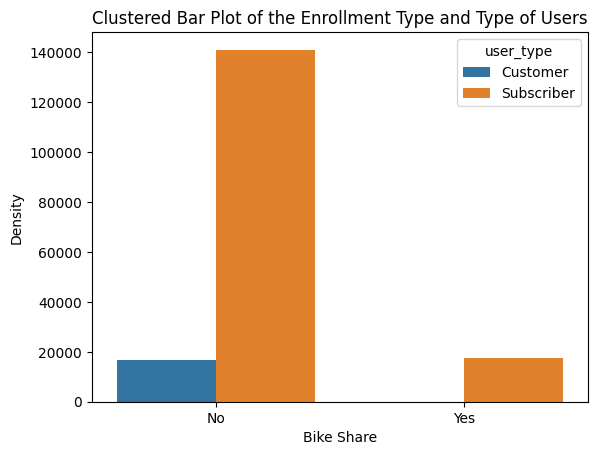

In [22]:
# Create a clustered bar plot using Seaborn to visualize the count of each category in 'bike_share_for_all_trip' 
# with hue differentiation based on 'user_type'
sns.countplot(data=df, x='bike_share_for_all_trip', hue='user_type')

# Set labels for the x-axis and y-axis, and a title for the plot
plt.xlabel('Bike Share')
plt.ylabel('Density')
plt.title('Clustered Bar Plot of the Enrollment Type and Type of Users');


we can see that the users who share their bike are the subscribers only not all of them but subset fo them

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I used bike share and users type and the gender and the age of the users the age was not as expected there is no corroleation between the age and the duration which I thought would be that

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes the only group that share bike is subscriber only and even if the women is less than men but the duration at the women group is more 

## Multivariate Exploration

### **who has more customers in ration to the subs  ?**

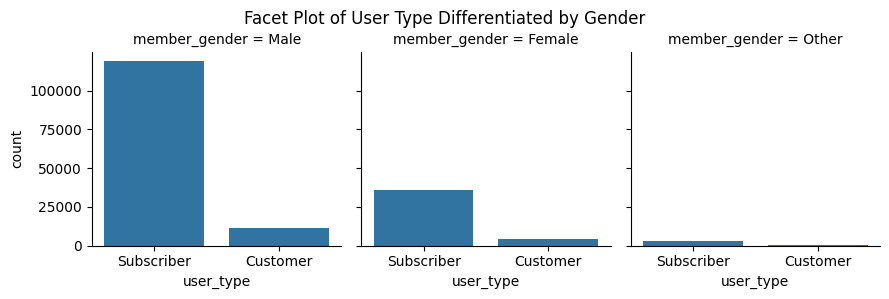

In [23]:
# Define the order of user types
user_type_order = ['Subscriber', 'Customer']

# Create a FacetGrid using Seaborn to visualize count plots for 'user_type' 
# across different 'member_gender' with specified order.
g = sns.FacetGrid(data=df, col='member_gender')

# Map count plots onto the FacetGrid with specified column, plot type, and order
g.map(sns.countplot, 'user_type', order=user_type_order)

# Adjust the layout to make room for the suptitle
g.fig.subplots_adjust(top=0.84)

# Add a suptitle to the entire FacetGrid
g.fig.suptitle('Facet Plot of User Type Differentiated by Gender');


women have more customer ratio than men but men have more customers as number

### **Is ther coloration between Gender and Duration ?**

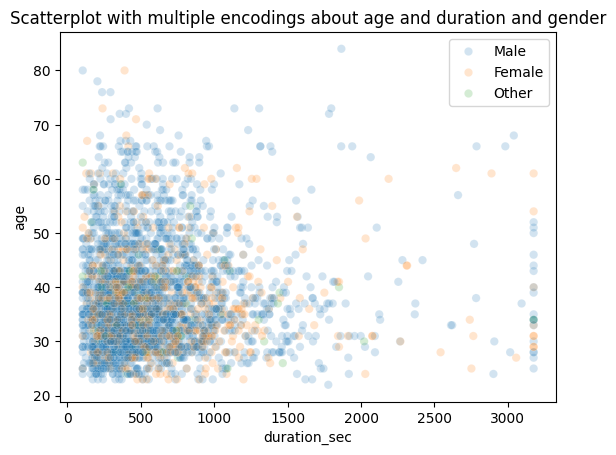

In [24]:
sampled_data = df.sample(n=3000, random_state=25)

sns.scatterplot(data=sampled_data,x='duration_sec',y='age',hue='member_gender',alpha=0.2)

plt.legend();
plt.title('Scatterplot with multiple encodings about age and duration and gender');


there is no coloration between gender and duration even though female duration average is more than males in this sample space

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in this section I showed faced chart to show if where are the most customers ratio and I found that women have a bit more customers precentage the men in and in the Scatterplot with multiple encodings it shows that the duration doesn't have an effect in  gender or age

### Were there any interesting or surprising interactions between features?

> nothhing is surprising in this the female and male have the same behaivor but in men more condense

## Conclusions


In the end of the exploration the most gender was using the service are male but female have more duration usage accourding to the plot and most of the users using the service is about and less than 1000 second wich is about 16 minutes and the service are used mostly by customers not subscribers to the service


In [25]:
!python -m nbconvert --to html Part_I_exploration_template
df.to_csv('cleaned_dataset_for_ford_gobike.csv',index=False)

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 866615 bytes to Part_I_exploration_template.html
